# **CS166 First Project**

## Waiting for the Bus

### **Overview**

In this project, I complete the implementation of a bus route simulation. I experiment with different strategies for setting departure times on the bus route and measure how well the different strategies work.

The purpose of this assignment is to go through the entire modeling, simulation, and analysis process. Throughout this course, this modelinng-simulation-analysis process will be repeated a few times. This is an opportunity to learn.

### **Feedback and Grading**

The part of the work that I would like feedback on the most is the descriptive analysis of the comparison between expected analytical results and empirical results. 

### **Basic Model (Required)**

A circular bus route operates 24 hours per day. The buses on the route allow passengers to embark and disembark at 15 different stops before looping back to the start of the route. At each bus stop, passengers wait until the next bus arrives, get on the bus, and finally get off the bus at their chosen destination. The rate at which passengers join the queue at a bus stop is constant and does not depend on the time of day.

In queueing theory, we can use an M/G/1 queue as a model to a Bus System where arrivals are Markovian or in other words that come from an exponential distribution.

In this scenario the average arrival rate $\lambda = 1$ which means that the arrival distribution can be expressed in the following way.

```
average_arrival_rate = 1
arrival_distribution = sts.expon(scale=1/average_arrival_rate)
```

We can represent the 15 different stops in the bus route in a list.

```
bus_stops = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
```

The instructions mention that the passenger chooses uniformly at random a destination that is at most 7 stops away from where they start. An additional assumption is that their destination is at least 1 stop away from where they start because otherwise there is no reason for them to queue. For the sake of this implementation of the simulation, we can also assume that the passenger gets initially assigned to one of the stops uniformly at random.  We represent that in the following way:

```
initial_bus_stop = random.randint(0,14)
destination_bus_stop = (initial_bus_stop + random.randint(1,7)) % 15
```

An example for a single passenger below:

In [ ]:
import random
initial_bus_stop = random.randint(0,14)
destination_bus_stop = (initial_bus_stop + random.randint(1,7)) % 15
print("The initial bus stop is", initial_bus_stop, "and the destination bus stop is", destination_bus_stop)

The initial bus stop is 12 and the destination bus stop is 1


When a bus stops, the time (in minutes) it takes passengers to disembark is normally distributed with mean $\mu_{1} = 0.03 \cdot n$ and standard deviation $\sigma_{1} = 0.01 \cdot \sqrt{n}$ where $n$ is the number of passengers who want to disembark.

** We know that the maximum capacity of each bus is 130 passengers, so the maximum number (given a full bus) of people that can disembark is also 130. There exists a possibility that no passenger disembarks which means that at a given stop if the bus has 130 passengers already and no passenger disembarks then no passenger in the queue embarks either. We can also assign the number of people in the bus (currently) and constrain the number of disembarking passengers by that number. We can assume that the number $n$ of passengers who want to disembark is simulated uniformly at random.

In [ ]:
import numpy as np
from math import sqrt

# The number of people in the bus in this case will have to be initialized manually
number_of_people_in_the_bus = 130

number_of_disembarking_passengers = random.randint(0, number_of_people_in_the_bus)
number_of_seats_available_before_disembarking = 130 - number_of_people_in_the_bus
number_of_seats_available_after_disembarking = number_of_disembarking_passengers + number_of_seats_available_before_disembarking
time_to_disembark = np.random.normal(loc=0.03 * number_of_disembarking_passengers, scale=0.01 * sqrt(number_of_disembarking_passengers))

print("There are", number_of_people_in_the_bus, "passengers, so there are", number_of_seats_available_before_disembarking, "seats available before disembarking.")
print("The time (in minutes) it takes", number_of_disembarking_passengers, "passengers to disembark is", time_to_disembark, "minutes.")
print("There are", number_of_seats_available_after_disembarking, "seats available after disembarking takes place.")

There are 130 passengers, so there are 0 seats available before disembarking.
The time (in minutes) it takes 67 passengers to disembark is 1.9871338570912855 minutes.
There are 67 seats available after disembarking takes place.


After making the calculation for a few of this scenarios, I feel like the mean and standard deviation for the normally distributed time to disembark might be unrealistic. However, I will keep it as it is for sake of the simulation. 

For example, the time it takes 20 passengers to disembark is about 30 seconds which is not realistic.

The time it takes passengers in the queue to get on the bus is also normally distributed with mean $\mu_{2} = 0.05 \cdot n$ and standard deviation $\sigma_{2} = 0.01\cdot \sqrt{n}$ where $n$ can be one of two options: it is either the number of seats available in the bus (when there are more people in the queue vs seats available in the bus) or it is the number of people in the queu (when there are enough seats available in the bus). Aditionally, no passengers can embark while other passengers are still disembarking which means that the total time to "embark" for the people in the queue would be the time it takes for the passengers to disembark plus the time it takes them to embark.

In [ ]:
# The number of people in the queue in this case will have to be initialized manually
number_of_people_in_the_queue = 35

if number_of_seats_available_after_disembarking < number_of_people_in_the_queue:
    number_of_embarking_passengers = number_of_seats_available_after_disembarking
else:
    number_of_embarking_passengers = number_of_people_in_the_queue

time_to_embark = np.random.normal(loc=0.05 * number_of_embarking_passengers, scale=0.01 * sqrt(number_of_embarking_passengers))
total_time_to_embark = time_to_embark + time_to_disembark

print("The time it takes for", number_of_embarking_passengers, "passengers to embark is", time_to_embark, "minutes.")
print("However, passengers in the queue have to wait", time_to_disembark, "minutes before they can embark.")
print("So, in total, the time it takes for", number_of_embarking_passengers, "passengers to embark is", total_time_to_embark, "minutes.")

The time it takes for 35 passengers to embark is 1.7860699763052845 minutes.
However, passengers in the queue have to wait 1.9871338570912855 minutes before they can embark.
So, in total, the time it takes for 35 passengers to embark is 3.77320383339657 minutes.


Similarly to disembarking time, after making the calculation for a few of this scenarios, the mean and standard deviation for the normally distributed time to embark is a bit unrealistic. However, I will keep it as it is for sake of the simulation. 

For example, the time it takes 8 passengers to embark is about 20 seconds (without considering the time they have to wait for passengers to disembark).

The maximum capacity of each bus is 130 passengers. If the bus is full, no more passengers can embark and they have to wait for the next bus to arrive.

The travel time of the bus between consecutive bus stops follows a normal distribution with parameters $\mu_{3} = 2$ minutes and $\sigma_{3} = 0.5$ minutes. 

In [ ]:
travel_time_between_bus_stops = np.random.normal(loc=2, scale=0.5)
print("The travel time between bus stops is", travel_time_between_bus_stops)

The travel time between bus stops is 2.357937475047993


So, the average service rate would include the travel time, the time for disembarking, and the time of embarking.

In [ ]:
average_service_time = travel_time_between_bus_stops + total_time_to_embark
print("The average service time (amount of time taken for passenger in the next bus stop to embark) is", average_service_time)

The average service time (amount of time taken for passenger in the next bus stop to embark) is 6.131141308444564


Considering the basic model above, we can calculate the average passenger waiting time for a bus system followin M/G/1 queues propertie. Waiting time here is the duration between a passenger joining a queue at a bus stop and when the passenger gets on the bus.

The average service time $\tau = \frac{1}{\lambda} = 1$

The variance of service is 

In [ ]:
import heapq

class Event:
    '''
    Store the properties of one event in the Schedule class defined below. Each
    event has a time at which it needs to run, a function to call when running
    the event, along with the arguments and keyword arguments to pass to that
    function.
    '''
    def __init__(self, timestamp, function, *args, **kwargs):
        self.timestamp = timestamp
        self.function = function
        self.args = args
        self.kwargs = kwargs

    def __lt__(self, other):
        '''
        This overloads the less-than operator in Python. We need it so the
        priority queue knows how to compare two events. We want events with
        earlier (smaller) times to go first.
        '''
        return self.timestamp < other.timestamp

    def run(self, schedule):
        '''
        Run an event by calling the function with its arguments and keyword
        arguments. The first argument to any event function is always the
        schedule in which events are being tracked. The schedule object can be
        used to add new events to the priority queue.
        '''
        self.function(schedule, *self.args, **self.kwargs)


class Schedule:
    '''
    Implement an event schedule using a priority queue. You can add events and
    run the next event.
    
    The `now` attribute contains the time at which the last event was run.
    '''
    
    def __init__(self):
        self.now = 0  # Keep track of the current simulation time
        self.priority_queue = []  # The priority queue of events to run
    
    def add_event_at(self, timestamp, function, *args, **kwargs):
        # Add an event to the schedule at a particular point in time.
        heapq.heappush(
            self.priority_queue,
            Event(timestamp, function, *args, **kwargs))
    
    def add_event_after(self, interval, function, *args, **kwargs):
        # Add an event to the schedule after a specified time interval.
        self.add_event_at(self.now + interval, function, *args, **kwargs)
    
    def next_event_time(self):
        return self.priority_queue[0].timestamp

    def run_next_event(self):
        # Get the next event from the priority queue and run it.
        event = heapq.heappop(self.priority_queue)
        self.now = event.timestamp
        event.run(self)
        
    def __repr__(self):
        return (
            f'Schedule() at time {self.now} ' +
            f'with {len(self.priority_queue)} events in the queue')
    
    def print_events(self):
        print(repr(self))
        for event in sorted(self.priority_queue):
            print(f'   {event.timestamp}: {event.function.__name__}')

In [ ]:
class Queue:
    def __init__(self, service_distribution):
        self.service_distribution = service_distribution
        # We start with an empty queue and the server not busy
        self.people_in_queue = 0
        self.people_being_served = 0

    def add_customer(self, schedule):
        # Add the customer to the queue
        self.people_in_queue += 1
        if self.people_being_served < 1:
            # This customer can be served immediately
            schedule.add_event_after(0, self.start_serving_customer)
            
    def start_serving_customer(self, schedule):
        # Move the customer from the queue to a server
        self.people_in_queue -= 1
        self.people_being_served += 1
        # Schedule when the server will be done with the customer
        schedule.add_event_after(
            self.service_distribution.rvs(),
            self.finish_serving_customer)
            
    def finish_serving_customer(self, schedule):
        # Remove the customer from the server
        self.people_being_served -= 1
        if self.people_in_queue > 0:
            # There are more people in the queue so serve the next customer
            schedule.add_event_after(0, self.start_serving_customer)


class BusSystem:
    
    def __init__(self, arrival_distribution, service_distribution):
        self.queue = Queue(service_distribution)
        self.arrival_distribution = arrival_distribution

    def add_customer(self, schedule):
        # Add this customer to the queue
        self.queue.add_customer(schedule)
        # Schedule when to add another customer
        schedule.add_event_after(
            self.arrival_distribution.rvs(),
            self.add_customer)

    def run(self, schedule):
        # Schedule when the first customer arrives
        schedule.add_event_after(
            self.arrival_distribution.rvs(),
            self.add_customer)
        

def run_simulation(arrival_distribution, service_distribution, run_until):
    schedule = Schedule()
    bus_system = BusSystem(arrival_distribution, service_distribution)
    bus_system.run(schedule)
    while schedule.next_event_time() < run_until:
        schedule.run_next_event()
    return bus_system

In [ ]:
service_time_list = []
total_time_spent = []

for i in range(10000):
    # The number of people in the bus in this case will be initialized randomly in every iteration
    number_of_people_in_the_bus = random.randint(0, 130)

    number_of_disembarking_passengers = random.randint(0, number_of_people_in_the_bus)
    number_of_seats_available_before_disembarking = 130 - number_of_people_in_the_bus
    number_of_seats_available_after_disembarking = number_of_disembarking_passengers + number_of_seats_available_before_disembarking
    time_to_disembark = np.random.normal(loc=0.03 * number_of_disembarking_passengers, scale=0.01 * sqrt(number_of_disembarking_passengers))

    # The number of people in the queue in this case will have to be initialized randomly 
    # Since the arrival rate to the queue is relatively low and considering a system where 
    # there is 15 buses; the passengers in the queue will wait approx. 2 min for bus travel time
    # and relatively less time for disembark and embarking time. In every iteration, the
    # number of people in the queue will be somewhere between 0, 1, 2, 3, and 4
    number_of_people_in_the_queue = random.randint(0, 2)

    if number_of_seats_available_after_disembarking < number_of_people_in_the_queue:
        number_of_embarking_passengers = number_of_seats_available_after_disembarking
    else:
        number_of_embarking_passengers = number_of_people_in_the_queue

    time_to_embark = np.random.normal(loc=0.05 * number_of_embarking_passengers, scale=0.01 * sqrt(number_of_embarking_passengers))
    total_time_to_embark = time_to_embark + time_to_disembark

    travel_time_between_bus_stops = np.random.normal(loc=2, scale=0.5)
    average_service_time = travel_time_between_bus_stops + time_to_disembark
    total_time_to_queue = travel_time_between_bus_stops + total_time_to_embark
    service_time_list.append(average_service_time)
    total_time_spent.append(total_time_to_queue)

In [ ]:
import statistics
import matplotlib.pyplot as plt
mu = statistics.mean(service_time_list)

In [ ]:
sigma_stdev = statistics.stdev(service_time_list)

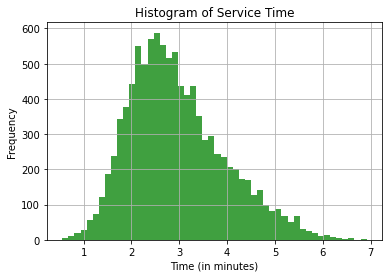

In [ ]:
# the histogram of the data
n, bins, patches = plt.hist(service_time_list, 50, density=False, facecolor='g', alpha=0.75)

plt.xlabel('Time (in minutes)')
plt.ylabel('Frequency')
plt.title('Histogram of Service Time')
plt.grid(True)
plt.show()

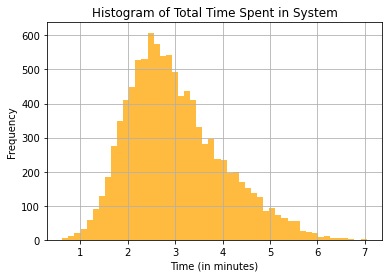

In [ ]:
# the histogram of the data
n, bins, patches = plt.hist(total_time_spent, 50, density=False, facecolor='orange', alpha=0.75)

plt.xlabel('Time (in minutes)')
plt.ylabel('Frequency')
plt.title('Histogram of Total Time Spent in System')
plt.grid(True)
plt.show()

Figure. The average waiting time in queueing theory means that in this scenario the passenger waits for the bus to arrive and for passengers to disembark. The time spent embarking is the time being served. This represents the total time spent in the system which also includes serving time. 

In [ ]:
# Run a short test with an M/M/1 queue
import scipy.stats as sts
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

average_arrival_rate = 1
arrival_distribution = sts.expon(scale=1/average_arrival_rate)

distribution_time_to_disembark = sts.norm(loc=0.03 * number_of_disembarking_passengers, scale=0.01 * sqrt(number_of_disembarking_passengers))
distribution_time_to_embark = sts.norm(loc=0.05 * number_of_embarking_passengers, scale=0.01 * sqrt(number_of_embarking_passengers))
distribution_travel_time_between_bus_stops = sts.norm(loc=2, scale=0.5)

tau = 1/mu
sigma = sigma_stdev
service_distribution = sts.norm(loc=tau, scale=sigma)

# service_distribution = sts.expon(scale=1/1)
bus_system = run_simulation(arrival_distribution, service_distribution, run_until=100)
print(f'There is/are {bus_system.queue.people_in_queue} people in the queue')

There is/are 2 people in the queue


At equilibrium, the values such as the waiting time average to total amount a customer spends in the queue, so that would actually only include the bus travel time (passenger waiting for the bus) and the time it takes for current passengers to disembark. 

The waiting time for M/G/1 queues follows 

$$\frac{\rho \cdot \tau}{2\cdot (1-\rho)} \cdot \Bigg( 1+\frac{\sigma^2}{\tau^2} \Bigg)$$

where tau and sigma squared are the mean and variance of the servie time and not the rate distribution. From above we got that tau is 1 / mu and the variance sigma squared is `sigma_stdev ` squared.

In [ ]:
tau_equilibrium = 1 / mu
variance_equilibrium = sigma_stdev ** 2
rho_equilibrium = tau_equilibrium # this gets multiplied by lambda which is 1

average_waiting_time = (rho_equilibrium * tau_equilibrium) / (2 * (1 - rho_equilibrium)) * (1 + (variance_equilibrium/tau_equilibrium**2))
print("The average waiting time is", average_waiting_time, "minutes")

The average waiting time is 0.8386603266701833 minutes


In [ ]:
def run_experiment(arrival_rate_list, service_time_dist, run_until, num_trials):
    '''
    Run an experiment with different arrival rates for an M/G/1 queue. By
    setting the service time distribution appropriately, you can also simulate
    M/D/1 and M/M/1 queues.
    '''
    
    # We record only the mean and standard error of the mean for each experiment
    results_mean = []
    results_std_err = []

    for arrival_rate in tqdm(arrival_rate_list):
        arrival_distribution = sts.expon(scale=1/arrival_rate)
        queue_lengths = []
        for trial in range(num_trials):
            bus_system = run_simulation(
                arrival_distribution, service_time_dist, run_until)
            queue_lengths.append(bus_system.queue.people_in_queue)
        results_mean.append(np.mean(queue_lengths))
        results_std_err.append(sts.sem(queue_lengths))
        
    # Convert lists to arrays so we can easily add, subtract, and multiply them
    results_mean = np.array(results_mean)
    results_std_err = np.array(results_std_err)
    
    return results_mean, results_std_err


def make_error_plot(queue_type, rho, mean, std_err, theoretical_function):
    '''
    Plot the empirical mean and 95% confidence interval of the mean of the queue
    length. Also plot the theoretical value for the average queue length using the
    supplied theoretical function (a function of rho).
    '''
    
    plt.figure(figsize=(8, 6))
    plt.title(f'Average queue length for an {queue_type} queue')
    plt.xlabel('utilization ρ')
    plt.ylabel('average queue length')

    plt.errorbar(
        rho, mean, 1.96 * std_err,
        color='black', marker='o', capsize=5, linestyle='--', linewidth=1,
        label='empirical')

    plt.plot(
        rho, theoretical_function(rho),
        color='red', marker='o', linestyle='--', linewidth=1,
        label='theoretical')

    plt.legend()
    plt.show()

In [ ]:
# Run the M/G/1 queue experiment

tau = 1/mu
sigma = sigma_stdev
run_until = 300
num_trials = 100
service_distribution = sts.norm(loc=tau, scale=sigma)
arrival_rate_list = np.array([0.5, 0.6, 0.7, 0.8, 0.9, 0.95])

np.random.seed(123)
mg1_mean, mg1_std_err = run_experiment(arrival_rate_list, service_distribution, run_until, num_trials)
print('\nM/G/1 experiment complete')

100%|██████████| 6/6 [00:19<00:00,  3.28s/it]


M/G/1 experiment complete


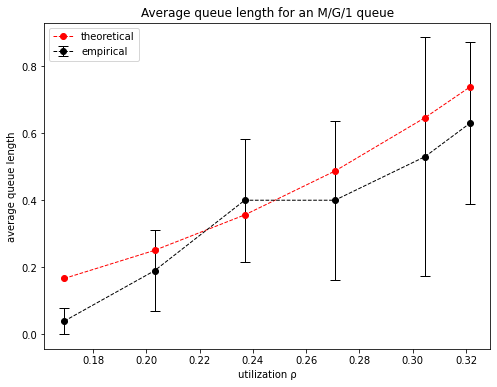

In [ ]:
# Plot the M/G/1 results

def theoretical_mg1(rho):
    return rho**2 / 2 / (1-rho) * (1 + sigma**2 / tau**2)

rho = arrival_rate_list * tau
make_error_plot('M/G/1', rho, mg1_mean, mg1_std_err, theoretical_mg1)

Figure. The average queue length in this scenario comparing analytical results and empirical results. Reveals the average queue lenght as the utilization $\rho$ increases. The Bus System uses M/G/1 queue to determine the properties of the different components of the simulation.